This is a Monte Carlo Simulation for a portfolio of the Maginificent 7 stocks which simulates the return of holiding these stocks for one year (252 days). A 300 day lookback is used for the covariance matrix from the 252 day forward simulation is based. 

The code is based on the QuantPy channel in YouTube, link below.
https://www.youtube.com/watch?v=6-dhdMDiYWQ

In [6]:
import math
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [7]:
#Import Data
def get_data(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix


In [11]:
stockList = ['AAPL', 'TSLA', 'NVDA', 'MSFT', 'META', 'GOOG', 'AMZN']
stocks = stockList
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)



[*********************100%%**********************]  7 of 7 completed
[0.11410841 0.17087421 0.34112618 0.06027628 0.1174234  0.05175954
 0.14443198]


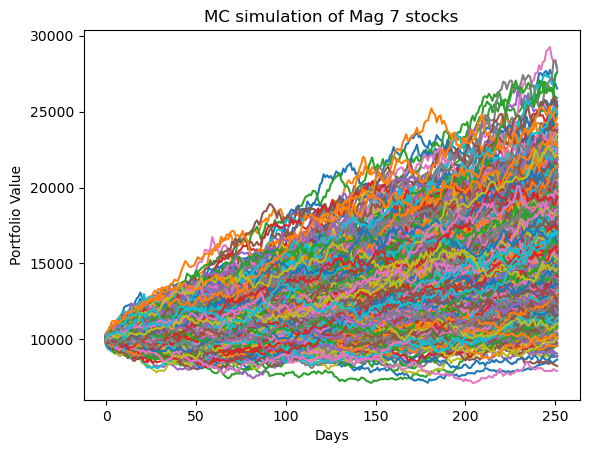

Average of MC 27%
Average of MC $12748.3


In [38]:
# Monte Carlo Method
# number of simulations
mc_sims = 1000
T = 252 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)


initialPortfolio = 10000 

for m in range(0, mc_sims):
    #MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:, m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
    
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value')
plt.xlabel('Days')
plt.title('MC simulation of Mag 7 stocks')
plt.show()
print('Average of MC {}%'.format(round(((portfolio_sims.mean()/initialPortfolio)-1)*100),0))
print('Average of MC ${}'.format(round(portfolio_sims.mean(),2)))